# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Set variable for api key
#api_key= weather_api_key.api_key & #qapi_key
url="http://api.openweathermap.org/data/2.5/weather?"
units="metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=66dcd14829dbb49d248307abfa805214&units=metric&q=


In [4]:
#response=requests.get(url)
#response_json=response.json()
#print(citipy.dumps(response_json, indent=4, sort_keys=True))
#print(url)
#response_json
#citipy.head()
print(requests.get(url))

<Response [401]>


In [40]:
#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude

#Set up Lists for required datasets
city_ls=[]
lat_ls=[]
lng_ls=[]
temp_ls=[]
humidity_ls=[]
cloud_ls=[]
wind_ls=[]
country_ls=[]
date_ls=[]

#set up into label
print("Beginning Data Retrieval")

# Create loop for each city info
for city in cities:
    try:
        response=requests.get(query_url + city).json()
        print(response)
        #print("city")
        #city_ls.append(response["main"]["city"])
        #lat("latitude")
        lat=response["coord"]["lat"]
        lat_ls.append(lat)
        lng=response["coord"]["lon"]
        lng_ls.append(lng)
        temp=response["main"]["temp_max"]
        temp_ls.append(temp)
        humidity=response["main"]["humidity"]
        humidity_ls.append(humidity)
        clouds=response["clouds"]["all"]
        cloud_ls.append(clouds)
        wind=response["wind"]["speed"]
        wind_ls.append(wind)
        country=response["sys"]["country"]
        country_ls.append(country)
        date=response["dt"]
        date_ls.append(date)
        #append city data through id or name?
        city_ls.append(response["name"])
    except:
        print("City Not Found")
    continue

Beginning Data Retrieval
{'coord': {'lon': -59.52, 'lat': 13.22}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 27, 'feels_like': 25.59, 'temp_min': 27, 'temp_max': 27, 'pressure': 1015, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 8.7, 'deg': 100}, 'clouds': {'all': 40}, 'dt': 1589705421, 'sys': {'type': 1, 'id': 8772, 'country': 'BB', 'sunrise': 1589707915, 'sunset': 1589753838}, 'timezone': -14400, 'id': 3374083, 'name': 'Bathsheba', 'cod': 200}
city
{'coord': {'lon': -90.35, 'lat': -0.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 22.78, 'feels_like': 25.88, 'temp_min': 22.78, 'temp_max': 22.78, 'pressure': 1009, 'humidity': 93}, 'wind': {'speed': 1.98, 'deg': 135}, 'clouds': {'all': 0}, 'dt': 1589705421, 'sys': {'type': 3, 'id': 2005652, 'country': 'EC', 'sunrise': 1589716527, 'sunset': 1589760024}, 'timezone': -2

{'coord': {'lon': -66.34, 'lat': -33.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 11.63, 'feels_like': 9.43, 'temp_min': 11.63, 'temp_max': 11.63, 'pressure': 1012, 'humidity': 58, 'sea_level': 1012, 'grnd_level': 928}, 'wind': {'speed': 1.17, 'deg': 105}, 'clouds': {'all': 0}, 'dt': 1589705350, 'sys': {'country': 'AR', 'sunrise': 1589713877, 'sunset': 1589751149}, 'timezone': -10800, 'id': 3837056, 'name': 'San Luis', 'cod': 200}
city
{'coord': {'lon': -42.03, 'lat': -22.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 21.07, 'feels_like': 21.73, 'temp_min': 21.07, 'temp_max': 21.07, 'pressure': 1018, 'humidity': 85, 'sea_level': 1018, 'grnd_level': 1017}, 'wind': {'speed': 3.33, 'deg': 335}, 'clouds': {'all': 1}, 'dt': 1589705350, 'sys': {'country': 'BR', 'sunrise': 1589706914, 'sunset': 1589746444}, 'timezone': -10800, 'id':

{'coord': {'lon': 105.15, 'lat': 9.18}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 32.83, 'feels_like': 35.46, 'temp_min': 32.83, 'temp_max': 32.83, 'pressure': 1004, 'humidity': 54, 'sea_level': 1004, 'grnd_level': 1004}, 'wind': {'speed': 3.16, 'deg': 236}, 'clouds': {'all': 100}, 'dt': 1589705195, 'sys': {'country': 'VN', 'sunrise': 1589668758, 'sunset': 1589713950}, 'timezone': 25200, 'id': 1586443, 'name': 'Ca Mau', 'cod': 200}
city
{'coord': {'lon': -70.48, 'lat': -25.4}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 13.71, 'feels_like': 12.81, 'temp_min': 13.71, 'temp_max': 13.71, 'pressure': 1014, 'humidity': 76, 'sea_level': 1014, 'grnd_level': 1012}, 'wind': {'speed': 1.18, 'deg': 43}, 'clouds': {'all': 52}, 'dt': 1589705428, 'sys': {'country': 'CL', 'sunrise': 1589713990, 'sunset': 1589753024}, 'timezone': -1

{'coord': {'lon': 140.33, 'lat': -8.47}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 27.36, 'feels_like': 27.52, 'temp_min': 27.36, 'temp_max': 27.36, 'pressure': 1008, 'humidity': 79, 'sea_level': 1008, 'grnd_level': 1008}, 'wind': {'speed': 7.57, 'deg': 129}, 'clouds': {'all': 97}, 'dt': 1589705431, 'sys': {'country': 'ID', 'sunrise': 1589661816, 'sunset': 1589704005}, 'timezone': 32400, 'id': 2082539, 'name': 'Merauke', 'cod': 200}
city
{'coord': {'lon': -28.7, 'lat': 38.52}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 17, 'feels_like': 15.74, 'temp_min': 17, 'temp_max': 17, 'pressure': 1023, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 330}, 'clouds': {'all': 20}, 'dt': 1589705432, 'sys': {'type': 1, 'id': 6883, 'country': 'PT', 'sunrise': 1589697679, 'sunset': 1589749280}, 'timezone': 0, 'id': 

{'cod': '404', 'message': 'city not found'}
city
City Not Found
{'coord': {'lon': -15.98, 'lat': 18.09}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 23, 'feels_like': 16.11, 'temp_min': 23, 'temp_max': 23, 'pressure': 1013, 'humidity': 27}, 'visibility': 10000, 'wind': {'speed': 7.7, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1589705435, 'sys': {'type': 1, 'id': 2482, 'country': 'MR', 'sunrise': 1589697013, 'sunset': 1589743840}, 'timezone': 0, 'id': 2377450, 'name': 'Nouakchott', 'cod': 200}
city
{'coord': {'lon': -65.1, 'lat': -43.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 12.04, 'feels_like': 2.66, 'temp_min': 12.04, 'temp_max': 12.04, 'pressure': 1011, 'humidity': 50, 'sea_level': 1011, 'grnd_level': 1009}, 'wind': {'speed': 10.99, 'deg': 261}, 'clouds': {'all': 0}, 'dt': 1589705435, 'sys': {'country': 'AR', 'sunrise': 15897

{'coord': {'lon': 138.73, 'lat': -34.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 14.69, 'feels_like': 12.87, 'temp_min': 12.78, 'temp_max': 16.11, 'pressure': 1027, 'humidity': 68}, 'wind': {'speed': 2.24, 'deg': 131, 'gust': 4.02}, 'clouds': {'all': 0}, 'dt': 1589705438, 'sys': {'type': 3, 'id': 2002614, 'country': 'AU', 'sunrise': 1589664795, 'sunset': 1589701795}, 'timezone': 34200, 'id': 2071059, 'name': 'Gawler', 'cod': 200}
city
{'coord': {'lon': -125.55, 'lat': 48.93}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 12.22, 'feels_like': 11.15, 'temp_min': 12.22, 'temp_max': 12.22, 'pressure': 1005, 'humidity': 93}, 'wind': {'speed': 2.04, 'deg': 164}, 'rain': {'1h': 0.25}, 'clouds': {'all': 94}, 'dt': 1589705438, 'sys': {'type': 3, 'id': 19458, 'country': 'CA', 'sunrise': 1589719012, 'sunset': 1589774436}, 'timezone': -2520

{'coord': {'lon': 122.67, 'lat': 11}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 31.4, 'feels_like': 34.95, 'temp_min': 31.4, 'temp_max': 31.4, 'pressure': 1005, 'humidity': 66, 'sea_level': 1005, 'grnd_level': 1002}, 'wind': {'speed': 3.47, 'deg': 66}, 'clouds': {'all': 30}, 'dt': 1589705442, 'sys': {'country': 'PH', 'sunrise': 1589664394, 'sunset': 1589709905}, 'timezone': 28800, 'id': 1714733, 'name': 'Dingle', 'cod': 200}
city
{'coord': {'lon': -34.86, 'lat': -8.01}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 24, 'feels_like': 28.18, 'temp_min': 24, 'temp_max': 24, 'pressure': 1014, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 320}, 'clouds': {'all': 40}, 'dt': 1589705442, 'sys': {'type': 1, 'id': 8426, 'country': 'BR', 'sunrise': 1589703828, 'sunset': 1589746088}, 'timezone': -10800, '

{'coord': {'lon': 25.14, 'lat': 5.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 32.07, 'feels_like': 34.86, 'temp_min': 32.07, 'temp_max': 32.07, 'pressure': 1013, 'humidity': 51, 'sea_level': 1013, 'grnd_level': 951}, 'wind': {'speed': 1.74, 'deg': 254}, 'clouds': {'all': 10}, 'dt': 1589705445, 'sys': {'country': 'CF', 'sunrise': 1589688318, 'sunset': 1589732796}, 'timezone': 3600, 'id': 235826, 'name': 'Zemio', 'cod': 200}
city
{'coord': {'lon': 82.18, 'lat': 29.27}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 21.11, 'feels_like': 24.46, 'temp_min': 21.11, 'temp_max': 21.11, 'pressure': 1012, 'humidity': 93}, 'wind': {'speed': 0.45, 'deg': 260, 'gust': 1.34}, 'clouds': {'all': 0}, 'dt': 1589705445, 'sys': {'type': 3, 'id': 2004727, 'country': 'NP', 'sunrise': 1589672291, 'sunset': 1589721444}, 'timezone': 20700, 'id': 1283285

{'coord': {'lon': -108.22, 'lat': 36.73}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 12.11, 'feels_like': 6.99, 'temp_min': 12, 'temp_max': 12.22, 'pressure': 1016, 'humidity': 30}, 'visibility': 16093, 'wind': {'speed': 3.6, 'deg': 360}, 'clouds': {'all': 1}, 'dt': 1589705448, 'sys': {'type': 1, 'id': 4117, 'country': 'US', 'sunrise': 1589717014, 'sunset': 1589768116}, 'timezone': -21600, 'id': 5467328, 'name': 'Farmington', 'cod': 200}
city
{'coord': {'lon': 125.41, 'lat': -8.93}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 17.99, 'feels_like': 19.6, 'temp_min': 17.99, 'temp_max': 17.99, 'pressure': 1007, 'humidity': 100, 'sea_level': 1007, 'grnd_level': 853}, 'wind': {'speed': 1.68, 'deg': 123}, 'rain': {'1h': 0.23}, 'clouds': {'all': 78}, 'dt': 1589705449, 'sys': {'country': 'TL', 'sunrise': 1589665437, 'sunset': 1589707547},

{'coord': {'lon': -88.44, 'lat': 43.77}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 12.07, 'feels_like': 9.9, 'temp_min': 10.56, 'temp_max': 13, 'pressure': 1017, 'humidity': 71}, 'visibility': 16093, 'wind': {'speed': 2.1, 'deg': 50}, 'clouds': {'all': 90}, 'dt': 1589705452, 'sys': {'type': 1, 'id': 4109, 'country': 'US', 'sunrise': 1589711149, 'sunset': 1589764485}, 'timezone': -18000, 'id': 5253352, 'name': 'Fond du Lac', 'cod': 200}
city
{'coord': {'lon': 150.67, 'lat': -10.62}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.63, 'feels_like': 27.41, 'temp_min': 26.63, 'temp_max': 26.63, 'pressure': 1011, 'humidity': 83, 'sea_level': 1011, 'grnd_level': 1011}, 'wind': {'speed': 6.78, 'deg': 112}, 'clouds': {'all': 100}, 'dt': 1589705452, 'sys': {'country': 'PG', 'sunrise': 1589659520, 'sunset': 1589701339}, 'time

{'coord': {'lon': 24.73, 'lat': -34}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 21.3, 'feels_like': 17.79, 'temp_min': 21.3, 'temp_max': 21.3, 'pressure': 1020, 'humidity': 25, 'sea_level': 1020, 'grnd_level': 992}, 'wind': {'speed': 2.28, 'deg': 261}, 'clouds': {'all': 66}, 'dt': 1589705455, 'sys': {'country': 'ZA', 'sunrise': 1589692095, 'sunset': 1589729217}, 'timezone': 7200, 'id': 986717, 'name': 'Kruisfontein', 'cod': 200}
city
{'coord': {'lon': -123.17, 'lat': 55.3}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 9, 'feels_like': 7.82, 'temp_min': 9, 'temp_max': 9, 'pressure': 1007, 'humidity': 93}, 'visibility': 14484, 'wind': {'speed': 1}, 'clouds': {'all': 90}, 'dt': 1589705456, 'sys': {'type': 1, 'id': 1016, 'country': 'CA', 'sunrise': 1589716731, 'sunset': 1589775575}, 'timezone': -25200, 'id': 6063191, 'name': 'Ma

{'coord': {'lon': 44.24, 'lat': 65.85}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 9.39, 'feels_like': 6.31, 'temp_min': 9.39, 'temp_max': 9.39, 'pressure': 1003, 'humidity': 62, 'sea_level': 1003, 'grnd_level': 1001}, 'wind': {'speed': 2.13, 'deg': 83}, 'rain': {'1h': 0.6}, 'clouds': {'all': 71}, 'dt': 1589705459, 'sys': {'country': 'RU', 'sunrise': 1589671076, 'sunset': 1589740870}, 'timezone': 10800, 'id': 527321, 'name': "Mezen'", 'cod': 200}
city
{'coord': {'lon': 119.9, 'lat': 15.44}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 30.05, 'feels_like': 34.31, 'temp_min': 30.05, 'temp_max': 30.05, 'pressure': 1005, 'humidity': 73, 'sea_level': 1005, 'grnd_level': 1005}, 'wind': {'speed': 2.8, 'deg': 218}, 'rain': {'1h': 0.27}, 'clouds': {'all': 36}, 'dt': 1589705459, 'sys': {'country': 'PH', 'sunrise': 1589664658, 'sunset': 1589

{'coord': {'lon': -149.33, 'lat': -17.53}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.83, 'feels_like': 29.79, 'temp_min': 26.67, 'temp_max': 27, 'pressure': 1012, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 1.5, 'deg': 110}, 'clouds': {'all': 75}, 'dt': 1589705463, 'sys': {'type': 1, 'id': 7318, 'country': 'PF', 'sunrise': 1589645731, 'sunset': 1589686327}, 'timezone': -36000, 'id': 4033356, 'name': 'Tiarei', 'cod': 200}
city
{'coord': {'lon': -22.43, 'lat': 63.84}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 6, 'feels_like': -0.24, 'temp_min': 6, 'temp_max': 6, 'pressure': 1016, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 80}, 'clouds': {'all': 75}, 'dt': 1589705463, 'sys': {'type': 1, 'id': 90, 'country': 'IS', 'sunrise': 1589688637, 'sunset': 1589755312}, 'timezone': 0, 'id': 3

{'coord': {'lon': 28.68, 'lat': 7.27}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 35.49, 'feels_like': 39.29, 'temp_min': 35.49, 'temp_max': 35.49, 'pressure': 1012, 'humidity': 44, 'sea_level': 1012, 'grnd_level': 965}, 'wind': {'speed': 0.79, 'deg': 101}, 'clouds': {'all': 98}, 'dt': 1589705466, 'sys': {'country': 'SS', 'sunrise': 1589687276, 'sunset': 1589732139}, 'timezone': 10800, 'id': 365763, 'name': 'Tonj', 'cod': 200}
city
{'cod': '404', 'message': 'city not found'}
city
City Not Found
{'cod': '404', 'message': 'city not found'}
city
City Not Found
{'coord': {'lon': -92.44, 'lat': 39.42}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 18.43, 'feels_like': 20.37, 'temp_min': 17.78, 'temp_max': 18.89, 'pressure': 1010, 'humidity': 94}, 'wind': {'speed': 0.89, 'deg': 274, 'gust': 1.79}, 'rain': {'1h': 0.76}, 'clouds': {

{'coord': {'lon': -131.65, 'lat': 55.34}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 12.39, 'feels_like': 10.76, 'temp_min': 12, 'temp_max': 13, 'pressure': 1005, 'humidity': 81}, 'visibility': 16093, 'wind': {'speed': 2.1, 'deg': 170}, 'clouds': {'all': 90}, 'dt': 1589705470, 'sys': {'type': 1, 'id': 7741, 'country': 'US', 'sunrise': 1589718751, 'sunset': 1589777625}, 'timezone': -28800, 'id': 5554428, 'name': 'Ketchikan', 'cod': 200}
city
{'coord': {'lon': -72.74, 'lat': -8.27}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 19.73, 'feels_like': 22.42, 'temp_min': 19.73, 'temp_max': 19.73, 'pressure': 1013, 'humidity': 92, 'sea_level': 1013, 'grnd_level': 990}, 'wind': {'speed': 0.39, 'deg': 239}, 'clouds': {'all': 25}, 'dt': 1589705470, 'sys': {'country': 'BR', 'sunrise': 1589712943, 'sunset': 1589755156}, 'timezon

{'coord': {'lon': 18.07, 'lat': 1.64}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 31.2, 'feels_like': 35.07, 'temp_min': 31.2, 'temp_max': 31.2, 'pressure': 1013, 'humidity': 54, 'sea_level': 1013, 'grnd_level': 977}, 'wind': {'speed': 0.28, 'deg': 213}, 'clouds': {'all': 62}, 'dt': 1589705473, 'sys': {'country': 'CG', 'sunrise': 1589690304, 'sunset': 1589734204}, 'timezone': 3600, 'id': 2259655, 'name': 'Impfondo', 'cod': 200}
city
{'coord': {'lon': 34.37, 'lat': -4.27}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 23.92, 'feels_like': 23.58, 'temp_min': 23.92, 'temp_max': 23.92, 'pressure': 1016, 'humidity': 58, 'sea_level': 1016, 'grnd_level': 853}, 'wind': {'speed': 2.87, 'deg': 114}, 'clouds': {'all': 14}, 'dt': 1589705473, 'sys': {'country': 'TZ', 'sunrise': 1589686892, 'sunset': 1589729792}, 'timezone': 10800, 'id': 

{'coord': {'lon': -76.22, 'lat': -13.7}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}, {'id': 711, 'main': 'Smoke', 'description': 'smoke', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 16, 'feels_like': 15.86, 'temp_min': 16, 'temp_max': 16, 'pressure': 1012, 'humidity': 82}, 'visibility': 4000, 'wind': {'speed': 1.5, 'deg': 120}, 'clouds': {'all': 40}, 'dt': 1589705476, 'sys': {'type': 1, 'id': 8691, 'country': 'PE', 'sunrise': 1589714253, 'sunset': 1589755516}, 'timezone': -18000, 'id': 3932145, 'name': 'Pisco', 'cod': 200}
city
{'coord': {'lon': 45.7, 'lat': 51.02}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 16.67, 'feels_like': 12.17, 'temp_min': 16.67, 'temp_max': 16.67, 'pressure': 1017, 'humidity': 27}, 'wind': {'speed': 3.13, 'deg': 273, 'gust': 4.92}, 'rain': {'1h': 0.37}, 'clouds': {'all': 14}, 'dt': 1589705476, 'sys': {'type': 3, 'id': 2001834, 'country':

{'coord': {'lon': 35.5, 'lat': 54.5}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 14, 'feels_like': 6.56, 'temp_min': 14, 'temp_max': 14, 'pressure': 1013, 'humidity': 41}, 'visibility': 10000, 'wind': {'speed': 8, 'deg': 250}, 'rain': {'1h': 0.31}, 'clouds': {'all': 46}, 'dt': 1589705479, 'sys': {'type': 1, 'id': 9017, 'country': 'RU', 'sunrise': 1589678944, 'sunset': 1589737198}, 'timezone': 10800, 'id': 553899, 'name': 'Kaluzhskaya Oblast’', 'cod': 200}
city
{'coord': {'lon': 5.14, 'lat': 61.99}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 6.11, 'feels_like': -0.02, 'temp_min': 6.11, 'temp_max': 6.11, 'pressure': 1005, 'humidity': 92}, 'wind': {'speed': 7.13, 'deg': 256}, 'rain': {'1h': 0.57}, 'clouds': {'all': 90}, 'dt': 1589705479, 'sys': {'type': 3, 'id': 2003008, 'country': 'NO', 'sunrise': 1589683175, 'sunset': 1589747540}

{'coord': {'lon': -4.86, 'lat': 55.76}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 10.18, 'feels_like': 4.95, 'temp_min': 10, 'temp_max': 10.56, 'pressure': 1018, 'humidity': 93}, 'visibility': 8000, 'wind': {'speed': 7.2, 'deg': 210}, 'rain': {'1h': 1.52}, 'clouds': {'all': 100}, 'dt': 1589705483, 'sys': {'type': 1, 'id': 1441, 'country': 'GB', 'sunrise': 1589688220, 'sunset': 1589747295}, 'timezone': 3600, 'id': 2649738, 'name': 'Fairlie', 'cod': 200}
city
{'coord': {'lon': 77.59, 'lat': 60.73}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 19, 'feels_like': 15.67, 'temp_min': 19, 'temp_max': 19, 'pressure': 1009, 'humidity': 48}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 160}, 'clouds': {'all': 76}, 'dt': 1589705483, 'sys': {'type': 1, 'id': 8986, 'country': 'RU', 'sunrise': 1589666472, 'sunset': 1589729466}, 'tim

{'cod': '404', 'message': 'city not found'}
city
City Not Found
{'coord': {'lon': -0.62, 'lat': 5.35}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 28.73, 'feels_like': 32.22, 'temp_min': 28.73, 'temp_max': 28.73, 'pressure': 1013, 'humidity': 76, 'sea_level': 1013, 'grnd_level': 1010}, 'wind': {'speed': 3.39, 'deg': 270}, 'clouds': {'all': 74}, 'dt': 1589705487, 'sys': {'country': 'GH', 'sunrise': 1589694473, 'sunset': 1589739007}, 'timezone': 0, 'id': 2294034, 'name': 'Winneba', 'cod': 200}
city
{'coord': {'lon': -133.04, 'lat': 69.45}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -6.95, 'feels_like': -12.38, 'temp_min': -6.95, 'temp_max': -6.95, 'pressure': 1023, 'humidity': 97, 'sea_level': 1023, 'grnd_level': 1023}, 'wind': {'speed': 3.7, 'deg': 330}, 'clouds': {'all': 90}, 'dt': 1589705487, 'sys': {'country': 'CA',

{'coord': {'lon': 126.7, 'lat': 62.1}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 18.98, 'feels_like': 16.18, 'temp_min': 18.98, 'temp_max': 18.98, 'pressure': 1012, 'humidity': 34, 'sea_level': 1012, 'grnd_level': 988}, 'wind': {'speed': 1.8, 'deg': 327}, 'clouds': {'all': 100}, 'dt': 1589705490, 'sys': {'country': 'RU', 'sunrise': 1589653993, 'sunset': 1589718372}, 'timezone': 32400, 'id': 2026861, 'name': 'Berdigestyakh', 'cod': 200}
city
{'coord': {'lon': 102.5, 'lat': 71.97}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 6.92, 'feels_like': 0.59, 'temp_min': 6.92, 'temp_max': 6.92, 'pressure': 1013, 'humidity': 75, 'sea_level': 1013, 'grnd_level': 1010}, 'wind': {'speed': 6.84, 'deg': 165}, 'clouds': {'all': 88}, 'dt': 1589705491, 'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'timezone': 25200, 'id': 20225

{'coord': {'lon': -97.7, 'lat': 26.19}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 23.69, 'feels_like': 27.12, 'temp_min': 23, 'temp_max': 24, 'pressure': 1009, 'humidity': 88}, 'visibility': 16093, 'wind': {'speed': 1.5, 'deg': 180}, 'clouds': {'all': 20}, 'dt': 1589705494, 'sys': {'type': 1, 'id': 4420, 'country': 'US', 'sunrise': 1589715794, 'sunset': 1589764286}, 'timezone': -18000, 'id': 4696233, 'name': 'Harlingen', 'cod': 200}
city
{'cod': '404', 'message': 'city not found'}
city
City Not Found
{'cod': '404', 'message': 'city not found'}
city
City Not Found
{'coord': {'lon': 88.53, 'lat': 27.52}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 27.53, 'feels_like': 27.34, 'temp_min': 27.53, 'temp_max': 27.53, 'pressure': 1006, 'humidity': 44, 'sea_level': 1006, 'grnd_level': 909}, 'wind': {'speed': 2.16, 'deg': 192}, 'rain': 

{'coord': {'lon': 111.89, 'lat': -8.12}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 27.15, 'feels_like': 29.91, 'temp_min': 27.15, 'temp_max': 27.15, 'pressure': 1006, 'humidity': 82, 'sea_level': 1006, 'grnd_level': 996}, 'wind': {'speed': 4.21, 'deg': 151}, 'rain': {'1h': 0.33}, 'clouds': {'all': 98}, 'dt': 1589705498, 'sys': {'country': 'ID', 'sunrise': 1589668613, 'sunset': 1589710861}, 'timezone': 25200, 'id': 1648082, 'name': 'Boyolangu', 'cod': 200}
city
{'cod': '404', 'message': 'city not found'}
city
City Not Found
{'coord': {'lon': -80.73, 'lat': -0.95}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 25, 'feels_like': 25.31, 'temp_min': 25, 'temp_max': 25, 'pressure': 1009, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 200}, 'clouds': {'all': 90}, 'dt': 1589705498, 'sys': {'type': 1, 'id': 8552

{'coord': {'lon': 167.55, 'lat': -13.88}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 26.36, 'feels_like': 26.16, 'temp_min': 26.36, 'temp_max': 26.36, 'pressure': 1013, 'humidity': 89, 'sea_level': 1013, 'grnd_level': 1006}, 'wind': {'speed': 8.93, 'deg': 131}, 'rain': {'1h': 0.88}, 'clouds': {'all': 100}, 'dt': 1589705502, 'sys': {'country': 'VU', 'sunrise': 1589655753, 'sunset': 1589697003}, 'timezone': 39600, 'id': 2134814, 'name': 'Sola', 'cod': 200}
city
{'coord': {'lon': 17.08, 'lat': -23.32}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 24.26, 'feels_like': 18.77, 'temp_min': 24.26, 'temp_max': 24.26, 'pressure': 1022, 'humidity': 19, 'sea_level': 1022, 'grnd_level': 873}, 'wind': {'speed': 4.84, 'deg': 24}, 'clouds': {'all': 0}, 'dt': 1589705503, 'sys': {'country': 'NA', 'sunrise': 1589692758, 'sunset': 1589732226}, 'timez

{'coord': {'lon': -105.25, 'lat': 19.93}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 18.58, 'feels_like': 18.86, 'temp_min': 18.58, 'temp_max': 18.58, 'pressure': 1012, 'humidity': 68, 'sea_level': 1012, 'grnd_level': 1002}, 'wind': {'speed': 0.73, 'deg': 356}, 'clouds': {'all': 16}, 'dt': 1589705506, 'sys': {'country': 'MX', 'sunrise': 1589718255, 'sunset': 1589765449}, 'timezone': -18000, 'id': 3981391, 'name': 'Tomatlán', 'cod': 200}
city
{'coord': {'lon': -68.93, 'lat': -22.47}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 2, 'feels_like': -8.46, 'temp_min': 2, 'temp_max': 2, 'pressure': 1025, 'humidity': 17}, 'visibility': 10000, 'wind': {'speed': 9.8, 'deg': 110}, 'clouds': {'all': 0}, 'dt': 1589705405, 'sys': {'type': 1, 'id': 8480, 'country': 'CL', 'sunrise': 1589713322, 'sunset': 1589752947}, 'timezone': -14400, 'id': 3

{'coord': {'lon': 6.13, 'lat': 62.58}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 5.74, 'feels_like': -1.2, 'temp_min': 3.89, 'temp_max': 7, 'pressure': 1003, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 7.7, 'deg': 240}, 'rain': {'1h': 0.66}, 'clouds': {'all': 100}, 'dt': 1589705510, 'sys': {'type': 1, 'id': 1602, 'country': 'NO', 'sunrise': 1589682600, 'sunset': 1589747640}, 'timezone': 7200, 'id': 3141667, 'name': 'Roald', 'cod': 200}
city
{'coord': {'lon': -106.9, 'lat': 23.92}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 17.78, 'feels_like': 18.65, 'temp_min': 17.78, 'temp_max': 17.78, 'pressure': 1003, 'humidity': 96}, 'wind': {'speed': 2.24, 'deg': 90}, 'clouds': {'all': 0}, 'dt': 1589705510, 'sys': {'type': 3, 'id': 2010279, 'country': 'MX', 'sunrise': 1589718245, 'sunset': 1589766251}, 'timezone': -21600, 'id'

{'coord': {'lon': 117.13, 'lat': -20.78}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.65, 'feels_like': 23.31, 'temp_min': 26.65, 'temp_max': 26.65, 'pressure': 1014, 'humidity': 28, 'sea_level': 1014, 'grnd_level': 1011}, 'wind': {'speed': 3.65, 'deg': 24}, 'clouds': {'all': 61}, 'dt': 1589705514, 'sys': {'country': 'AU', 'sunrise': 1589668490, 'sunset': 1589708468}, 'timezone': 28800, 'id': 2062276, 'name': 'Roebourne', 'cod': 200}
city
{'coord': {'lon': 6.21, 'lat': 61.77}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 4.7, 'feels_like': -2.24, 'temp_min': 1.11, 'temp_max': 7, 'pressure': 1006, 'humidity': 87}, 'wind': {'speed': 7.7, 'deg': 270}, 'clouds': {'all': 100}, 'dt': 1589705514, 'sys': {'type': 1, 'id': 1616, 'country': 'NO', 'sunrise': 1589683040, 'sunset': 1589747162}, 'timezone': 7200, 'id': 3

{'coord': {'lon': 141.82, 'lat': 45.37}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 6, 'feels_like': -0.73, 'temp_min': 6, 'temp_max': 6, 'pressure': 1010, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 70}, 'clouds': {'all': 75}, 'dt': 1589705517, 'sys': {'type': 1, 'id': 7981, 'country': 'JP', 'sunrise': 1589655631, 'sunset': 1589709476}, 'timezone': 32400, 'id': 2129324, 'name': 'Makubetsu', 'cod': 200}
city
{'coord': {'lon': -59.78, 'lat': 8.2}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 23.52, 'feels_like': 26.92, 'temp_min': 23.52, 'temp_max': 23.52, 'pressure': 1013, 'humidity': 94, 'sea_level': 1013, 'grnd_level': 1010}, 'wind': {'speed': 2.24, 'deg': 82}, 'clouds': {'all': 96}, 'dt': 1589705517, 'sys': {'country': 'GY', 'sunrise': 1589708424, 'sunset': 1589753454}, 'timezone': -14400, 'i

{'coord': {'lon': 118.97, 'lat': -3.54}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 28.99, 'feels_like': 33.83, 'temp_min': 28.99, 'temp_max': 28.99, 'pressure': 1005, 'humidity': 80, 'sea_level': 1005, 'grnd_level': 1004}, 'wind': {'speed': 2.42, 'deg': 329}, 'rain': {'1h': 1.05}, 'clouds': {'all': 100}, 'dt': 1589705520, 'sys': {'country': 'ID', 'sunrise': 1589666525, 'sunset': 1589709550}, 'timezone': 28800, 'id': 1636806, 'name': 'Majene', 'cod': 200}
city
{'coord': {'lon': 63.58, 'lat': 61.36}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 14.09, 'feels_like': 10.94, 'temp_min': 14.09, 'temp_max': 14.09, 'pressure': 1006, 'humidity': 45, 'sea_level': 1006, 'grnd_level': 992}, 'wind': {'speed': 2.19, 'deg': 254}, 'clouds': {'all': 88}, 'dt': 1589705521, 'sys': {'country': 'RU', 'sunrise': 1589669512, 'sunset': 1589733

{'coord': {'lon': -27.07, 'lat': 38.73}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 17, 'feels_like': 16.71, 'temp_min': 17, 'temp_max': 17, 'pressure': 1023, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 2.72, 'deg': 350}, 'clouds': {'all': 75}, 'dt': 1589705524, 'sys': {'type': 1, 'id': 6895, 'country': 'PT', 'sunrise': 1589697257, 'sunset': 1589748920}, 'timezone': 0, 'id': 3372760, 'name': 'Praia da Vitória', 'cod': 200}
city
{'cod': '404', 'message': 'city not found'}
city
City Not Found
{'coord': {'lon': 135.88, 'lat': 46.49}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 8.11, 'feels_like': 6.52, 'temp_min': 8.11, 'temp_max': 8.11, 'pressure': 1009, 'humidity': 98, 'sea_level': 1009, 'grnd_level': 929}, 'wind': {'speed': 1.54, 'deg': 134}, 'rain': {'1h': 0.71}, 'clouds': {'all': 100}, 'dt': 1589705524, 'sys': 

{'coord': {'lon': -77.12, 'lat': 20.34}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 24.36, 'feels_like': 27.48, 'temp_min': 24.36, 'temp_max': 24.36, 'pressure': 1013, 'humidity': 81, 'sea_level': 1013, 'grnd_level': 1010}, 'wind': {'speed': 1.44, 'deg': 193}, 'clouds': {'all': 9}, 'dt': 1589705527, 'sys': {'country': 'CU', 'sunrise': 1589711465, 'sunset': 1589758737}, 'timezone': -14400, 'id': 3547867, 'name': 'Manzanillo', 'cod': 200}
city
{'coord': {'lon': -123.21, 'lat': 39.15}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 13.72, 'feels_like': 13.84, 'temp_min': 12.22, 'temp_max': 14.44, 'pressure': 1009, 'humidity': 100}, 'visibility': 16093, 'wind': {'speed': 1.5, 'deg': 170}, 'rain': {'1h': 0.38}, 'clouds': {'all': 90}, 'dt': 1589705527, 'sys': {'type': 1, 'id': 6129, 'country': 'US', 'sunrise': 1589720254, 'sunset': 158977

{'coord': {'lon': 167.72, 'lat': -45.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 6.33, 'feels_like': 4.6, 'temp_min': 6.33, 'temp_max': 6.33, 'pressure': 1029, 'humidity': 82, 'sea_level': 1029, 'grnd_level': 1002}, 'wind': {'speed': 0.45, 'deg': 341}, 'clouds': {'all': 1}, 'dt': 1589705530, 'sys': {'country': 'NZ', 'sunrise': 1589659421, 'sunset': 1589693254}, 'timezone': 43200, 'id': 2181625, 'name': 'Te Anau', 'cod': 200}
city
{'coord': {'lon': 150.18, 'lat': -35.72}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 11.67, 'feels_like': 10.94, 'temp_min': 11.67, 'temp_max': 11.67, 'pressure': 1030, 'humidity': 91}, 'wind': {'speed': 1.2, 'deg': 359}, 'clouds': {'all': 0}, 'dt': 1589705531, 'sys': {'type': 3, 'id': 37860, 'country': 'AU', 'sunrise': 1589662187, 'sunset': 1589698907}, 'timezone': 36000, 'id': 2176639, 'name': 'Ba

{'coord': {'lon': 87.98, 'lat': 65.82}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 8.56, 'feels_like': 5.06, 'temp_min': 8.56, 'temp_max': 8.56, 'pressure': 1011, 'humidity': 87, 'sea_level': 1011, 'grnd_level': 1005}, 'wind': {'speed': 3.85, 'deg': 157}, 'clouds': {'all': 100}, 'dt': 1589705534, 'sys': {'country': 'RU', 'sunrise': 1589660635, 'sunset': 1589730316}, 'timezone': 25200, 'id': 1488903, 'name': 'Turukhansk', 'cod': 200}
city
{'coord': {'lon': 143.3, 'lat': 59.38}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 4.02, 'feels_like': -0.04, 'temp_min': 4.02, 'temp_max': 4.02, 'pressure': 1020, 'humidity': 74, 'sea_level': 1020, 'grnd_level': 1020}, 'wind': {'speed': 2.93, 'deg': 222}, 'clouds': {'all': 62}, 'dt': 1589705534, 'sys': {'country': 'RU', 'sunrise': 1589651345, 'sunset': 1589713051}, 'timezone': 36000

In [6]:
print(len(city_ls))
print(len(lat_ls))
print(len(lng_ls))
print(len(temp_ls))
print(len(humidity_ls))
print(len(cloud_ls))
print(len(wind_ls))
print(len(country_ls))
print(len(date_ls))


535
535
535
535
535
535
535
535
535


In [7]:
weather_dt={
    "City": city_ls,
    "Lat": lat_ls,
    "Lng": lng_ls,
    "Max Temp": temp_ls,
    "Humidity": humidity_ls,
    "Cloudiness": cloud_ls,
    "Wind Speed": wind_ls,
    "Country": country_ls,
    "Date": date_ls
}
weather_data=pd.DataFrame(weather_dt)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bathsheba,13.22,-59.52,27.00,74,40,8.70,BB,1589704932
1,Puerto Ayora,-0.74,-90.35,22.78,93,0,1.98,EC,1589704933
2,Jijiga,9.35,42.80,23.93,62,63,5.63,ET,1589704933
3,Taoudenni,22.68,-3.98,30.32,13,0,5.71,ML,1589704933
4,Panalingaan,8.78,117.42,31.18,64,18,0.82,PH,1589704933


In [8]:
#Export data into a csv
#display dataframe

#weather_data.to_csv('New_weather_data.csv')
weather_data.count()

City          535
Lat           535
Lng           535
Max Temp      535
Humidity      535
Cloudiness    535
Wind Speed    535
Country       535
Date          535
dtype: int64

In [9]:
#inspect data and find cities with over 100% humidity


In [10]:
#  Get the indices of cities that have humidity over 100%.

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity 
#outliers by index.

#Remove any cities with excess of 99.9 humidity
#if(humidity>="100")
    #weather_data=weather_data.temp
#weather_data.loc["Humidity"]>=100, "" 
#weather_data[weather_data["Humidity"].map(len)>=100]
clean_df=weather_data.drop(weather_data[weather_data.Humidity>=99.9].index)
#weather_data=weather_data[weather_data.temp !="100"]
len(clean_df)
clean_df.count()

City          520
Lat           520
Lng           520
Max Temp      520
Humidity      520
Cloudiness    520
Wind Speed    520
Country       520
Date          520
dtype: int64

In [12]:
# Passing "inplace=False" will make a copy of the city_data DataFrame, 
#which we call "clean_city_data".
#clean_city_data=clean_df
# Extract relevant fields from the data frame
# Export the City_Data into a csv

clean_df.to_csv("clean_city_data_csv.csv")

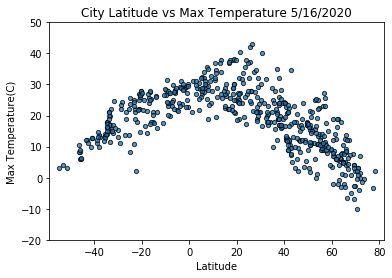

In [13]:
#Lat vs temp plot
#pull in data from 4/01 or today?

#graphdate=date.today()
#graphdate=time.strftime("%m/%d/%Y")
#fig, ax=plt.subplots()
#clean_df.plot(kind="scatter", x="Latitude", y="Max Temp", ax=ax)
#fig=plt.figure()
#ax=fig.gca()
#ax.set_xsticks(numpy.arange(0,1, 20))
#ax.set_ysticks(numpy.arange(0,1,20))

plt.scatter(clean_df["Lat"], clean_df["Max Temp"], marker= "o", s=18, alpha=.75, edgecolors="black")
#create labels
plt.title("City Latitude vs Max Temperature 5/16/2020")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.xlim([-59, 82])
plt.ylim([-20, 50])
plt.rcParams["axes.grid"]=True

#plt.scatter(grid=True)
#why the fuck does rcParams work but on .grid???????---look up later
#plt.grid(True)\

plt.savefig("TemperaturevsLat.png")
plt.show()

In [14]:
print("the data above portrays an analysis of latitude vs max temperature and takes on a unimodal shape, with max temperature spiking at -15 to 30 latitude, specifically around 20 latitude, before sharply falling as you stray futher from the equator")

the data above portrays a unimodal shape, with max temperature spiking at -15 to 25 latitude, specifically around 20 latitude, before sharply falling as you stray futher from the equator


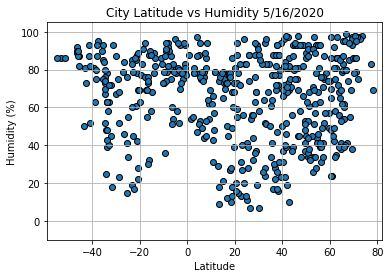

In [15]:
#latitude vs humidity
plt.scatter(clean_df["Lat"], clean_df["Humidity"], marker="o", edgecolor="black")
plt.title("City Latitude vs Humidity 5/16/2020")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim([-59, 82])
plt.ylim([-10, 105])
plt.rcParams["axes.grid"]=True
plt.savefig("Humidityvslat.png")
plt.show()

In [16]:
print("the data is showing the correlation between humidity and latitude, the dataplot seems to show a relationship between the uniformity of humidity and how near the city is to the equator, with the data becoming more variable as it strays further from 0 latitude.  THe data takes on a trimodal shape, with higher humidity very near the equator and higher humidity very far from the equator")

the data is showing the correlation between humidity and latitude, the dataplot seems to show a relationship between the uniformity of humidity and how near the city is to the equator, with the data becoming more variable as it strays further from 0 latitude.  THe data takes on a trimodal shape, with higher humidity very near the equator and higher humidity very far from the equator


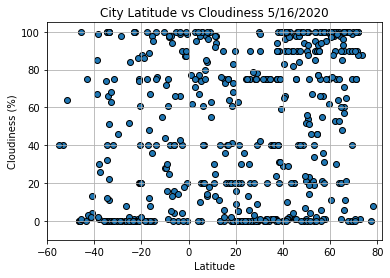

In [17]:
#Lat vs Clouds
plt.scatter(clean_df["Lat"], clean_df["Cloudiness"], marker="o", edgecolor="black")
plt.title("City Latitude vs Cloudiness 5/16/2020")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim([-60, 82])
plt.ylim([-10, 105])
plt.rcParams["axes.grid"]=True
plt.savefig("CloudinessvsLat.png")
plt.show()

In [18]:
print("the plot is analyzing the differences between cloudiness by latitude, the data sees to portray more variable wind speeds around the equator, less wind around 20-40 latitude away from the equator, and much more wind around 40-65 latitude from the equator")

the plot is analyzing the differences between cloudiness by latitude, the data sees to portray more variable wind speeds around the equator, less wind around 20-40 latitude away from the equator, and much more wind around 40-65 latitude from the equator


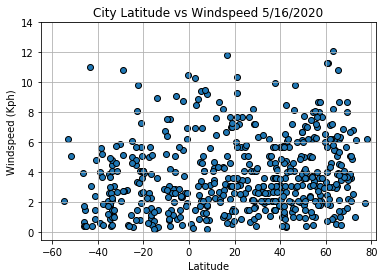

In [19]:
#Lat vs windspeed
plt.scatter(clean_df["Lat"], clean_df["Wind Speed"], marker="o", edgecolor="black")
plt.title("City Latitude vs Windspeed 5/16/2020")
plt.xlabel("Latitude")
plt.ylabel("Windspeed (Kph)")
plt.xlim([-65, 82])
plt.ylim([-.5, 14])
plt.rcParams["axes.grid"]=True
plt.savefig("windspeedvslat.png")
plt.show()

In [20]:
print("The plot is analyzing the data between windspeed and distance from the equator, and it looks as if windspeed is variable across all latitudes, although there is a slight increase in wind speed around the equator")
# OPTIONAL: Create a function to create Linear Regression plots

The plot is analyzing the data between windspeed and distance from the equator, and it looks as if windspeed is variable across all latitudes, although there is a slight increase in wind speed around the equator


In [21]:
# Create Northern and Southern Hemisphere DataFrames
#loc <>lat to the 2 new df's
north=clean_df.loc[pd.to_numeric(clean_df["Lat"]).astype(float)>0, :]
south=clean_df.loc[pd.to_numeric(clean_df["Lat"]).astype(float)<0, :]
north.count()
#south.count()

City          364
Lat           364
Lng           364
Max Temp      364
Humidity      364
Cloudiness    364
Wind Speed    364
Country       364
Date          364
dtype: int64

The r-squared is: -0.8120985846098976


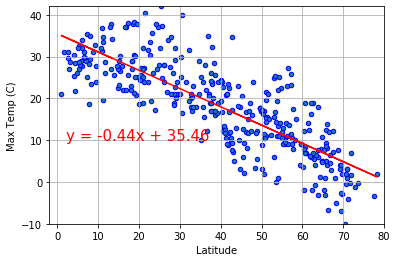

In [22]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
#perform the linear regression
#regress=linregress([pd.Dataframe(north["Lat"])], 
                   #[pd.Dataframe(north["Max Temp"])])
#slope, intercept, r_value, p_value, std_err=

#Define Variables
north_lat = pd.to_numeric(north["Lat"]).astype(float)
north_temp = pd.to_numeric(north["Max Temp"]).astype(float)

#Define Linear Regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)
regress_values = north_lat * slope + intercept

##line equation y=slopex+yint
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter
plt.scatter(north_lat,north_temp, marker="o", edgecolor="blue", s=20)

#create regression line
plt.plot(north_lat,regress_values,"r-")

#plt.rlabel(lineeq(6,10))
#label regression line w/annotate
#create font in the middle of graph
plt.annotate(line_eq,(2,10),fontsize=15,color="red")

#Create Labels
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.xlim([-2, 80])
plt.ylim([-10, 42])
#plt.title("Northern Hemisphere, Max Temp Vs Latitude Linear Regression")
print(f"The r-squared is: {rvalue}")

plt.savefig("1.png")
plt.show()

The r-squared is: 0.8036586849957611


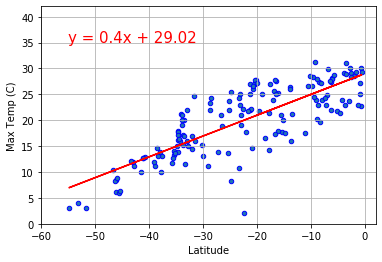

In [23]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression

#Define x and y values
south_lat = pd.to_numeric(south["Lat"]).astype(float)
south_temp = pd.to_numeric(south["Max Temp"]).astype(float)

#Define Linear Regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)
regress_values = south_lat * slope + intercept
#
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter
plt.scatter(south_lat,south_temp, marker="o", edgecolor="blue", s=20)

#create regression line
plt.plot(south_lat,regress_values,"r-")

#plt.rlabel(lineeq(6,10))
#label regression line w/annotate
#create font in the middle of graph
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")

#Create Labels
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.xlim([-60, 2])
plt.ylim([0, 42])
print(f"The r-squared is: {rvalue}")

plt.savefig("2.png")
plt.show()

In [24]:
print("Summary of Temperature: generally speakingm the further you get away from the equator, the colder the temperature gets.  However, the max temp tends to spike around 20 latitude from the equator, before rapidely falling below 20'C temp's")

Summary of Temperature: generally speakingm the further you get away from the equator, the colder the temperature gets.  However, the max temp tends to spike around 20 latitude from the equator, before rapidely falling below 20'C temp's


The r-squared is: 0.1402977455408031


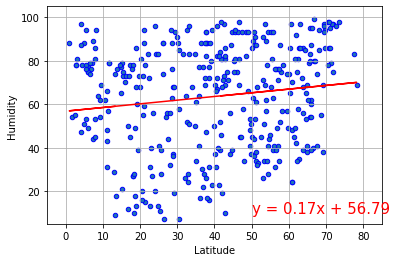

In [25]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

#Define variables

north_humid = pd.to_numeric(north["Humidity"]).astype(float)

#Define Linear Regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_humid)
regress_values = north_lat * slope + intercept
#
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter
plt.scatter(north_lat,north_humid, marker="o", edgecolor="blue", s=20)

#create regression line
plt.plot(north_lat,regress_values,"r-")

#plt.rlabel(lineeq(6,10))
#label regression line w/annotate
#create font in the middle of graph
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

#Create Labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim([-5, 85])
plt.ylim([5, 105])
print(f"The r-squared is: {rvalue}")

plt.savefig("3.png")
plt.show()

The r-squared is: 0.07458686414112665


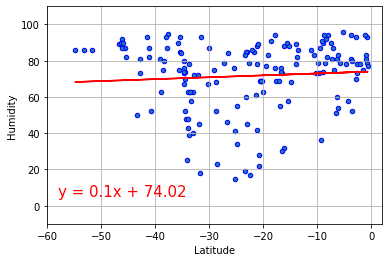

In [26]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression


#DefineVariables
south_humid = pd.to_numeric(south["Humidity"]).astype(float)

#Define Linear Regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_humid)
regress_values = south_lat * slope + intercept

#line equation y=slopex+yint
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter
plt.scatter(south_lat,south_humid, marker="o", edgecolor="blue", s=20)

#create regression line
plt.plot(south_lat,regress_values,"r-")

#plt.rlabel(lineeq(6,10))
#label regression line w/annotate
#create font in the middle of graph
plt.annotate(line_eq,(-58,5),fontsize=15,color="red")

#Create Labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim([-60, 2])
plt.ylim([-10, 110])
print(f"The r-squared is: {rvalue}")

plt.savefig("4.png")
plt.show()

In [27]:
print("Summary of Humidity: there is not much relationship between humidity and latitude, it does seem as if humidity skews around the equator, however the data is so randomized it is hard to come to a conclusion.  ALthough, there is one spike in lower humidity around -20 latitude from the equator.")

Summary of Humidity: there is not much relationship between humidity and latitude, it does seem as if humidity skews around the equator, however the data is so randomized it is hard to come to a conclusion.  ALthough, there is one spike in lower humidity around -20 latitude from the equator.


The r-squared is: 0.19664290172996227


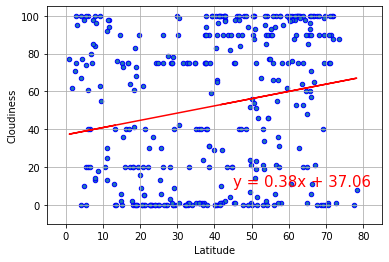

In [28]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regres

#Define variables

north_cloud = pd.to_numeric(north["Cloudiness"]).astype(float)

#Define Linear Regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloud)
regress_values = north_lat * slope + intercept
#
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter
plt.scatter(north_lat,north_cloud, marker="o", edgecolor="blue", s=20)

#create regression line
plt.plot(north_lat,regress_values,"r-")

#plt.rlabel(lineeq(6,10))
#label regression line w/annotate
#create font in the middle of graph
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

#Create Labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim([-5, 85])
plt.ylim([-10, 105])
print(f"The r-squared is: {rvalue}")

plt.savefig("5.png")
plt.show()

The r-squared is: 0.2312400061563529


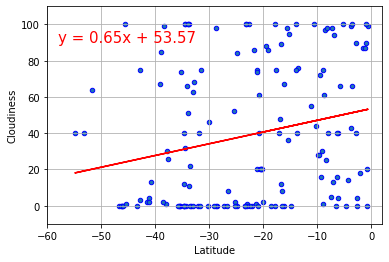

In [29]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regres

#DefineVariables
south_cloud = pd.to_numeric(south["Cloudiness"]).astype(float)

#Define Linear Regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloud)
regress_values = south_lat * slope + intercept

#line equation y=slopex+yint
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter
plt.scatter(south_lat,south_cloud, marker="o", edgecolor="blue", s=20)

#create regression line
plt.plot(south_lat,regress_values,"r-")

#plt.rlabel(lineeq(6,10))
#label regression line w/annotate
#create font in the middle of graph
plt.annotate(line_eq,(-58,90),fontsize=15,color="red")

#Create Labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim([-60, 2])
plt.ylim([-10, 110])
print(f"The r-squared is: {rvalue}")

plt.savefig("6.png")
plt.show()

In [30]:
print("Cloudiness Summary: There seems to be a higher percentage of data points with little cloud coverage or very high cloud coverage with not many in the middle and generally speaking the further you stray from the equator, the less cloudy it gets.")

Cloudiness Summary: There seems to be a higher percentage of data points with little cloud coverage or very high cloud coverage with not many in the middle and generally speaking the further you stray from the equator, the less cloudy it gets.


The r-squared is: 0.07530949009533391


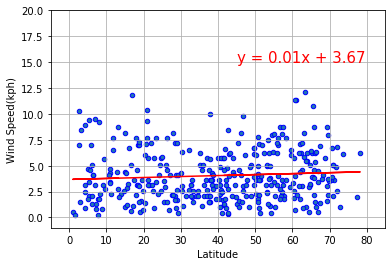

In [31]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


#Define variables
north_wind = pd.to_numeric(north["Wind Speed"]).astype(float)

#Define Linear Regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
#
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter
plt.scatter(north_lat,north_wind, marker="o", edgecolor="blue", s=20)

#create regression line
plt.plot(north_lat,regress_values,"r-")

#plt.rlabel(lineeq(6,10))
#label regression line w/annotate
#create font in the middle of graph
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

#Create Labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(kph)")
plt.xlim([-5, 85])
plt.ylim([-1, 20])
print(f"The r-squared is: {rvalue}")

plt.savefig("7.png")
plt.show()

The r-squared is: 0.11663815699180582


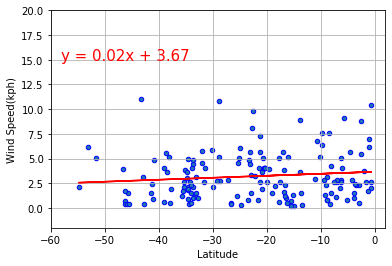

In [32]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

#DefineVariables
south_wind = pd.to_numeric(south["Wind Speed"]).astype(float)

#Define Linear Regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept

#line equation y=slopex+yint
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create scatter
plt.scatter(south_lat,south_wind, marker="o", edgecolor="blue", s=20)

#create regression line
plt.plot(south_lat,regress_values,"r-")

#plt.rlabel(lineeq(6,10))
#label regression line w/annotate
#create font in the middle of graph
plt.annotate(line_eq,(-58,15),fontsize=15,color="red")

#Create Labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(kph)")
plt.xlim([-60, 2])
plt.ylim([-2, 20])
print(f"The r-squared is: {rvalue}")

plt.savefig("8.png")
plt.show()

In [33]:
print("Summary: Wind speed seems to be somewhat bimodal, with a majority of high wid speed areas occuring for away from teh equator or very close by.")

Summary: Wind speed seems to be somewhat bimodal, with a majority of high wid speed areas occuring for away from teh equator or very close by.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [34]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [35]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

In [36]:
# OPTIONAL: Create a function to create Linear Regression plots

In [37]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression